In [ ]:
import string
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming

In [ ]:
TARGET = 'METHINKS*IT*IS*LIKE*A*WEASEL'
MUTATION_RATE = 0.08
POP_SIZE = 100
CROSSOVER_RATE = 0.9
STR_SIZE = len(TARGET)

In [ ]:
def initialize_pop(len_pop):
  pop = np.array([])

  for i in range (len_pop):
      indiv = ''.join(rd.choice(string.ascii_uppercase + '*') for i in range(len(alvo)))
      pop = np.append(pop, indiv)

  return(pop)

#Exemplo de execução
test = initialize_pop(19)
print(test)

['ZNIZKVLTREVYSJRVHEHFAEBRINTG' 'EET*HFTXMKEKYHELKDTNNZZEZKWK'
 'WKVBLSGBJLQSIPYTDNRJCUHSR*AT' 'YAATT*PBGMIIJMFMWYQOLXFZFRME'
 'IPBTNBA*EPQKVZDUQKKCJLAPEZXO' 'AQXMNYXXEUZHGHNYQI*FZUICFPFI'
 'SAHCPYT*AJPOTZLKISJMEUDIJLVK' 'PPGQYB*CBSXCJKUDCOUEZNPWBDHM'
 'SHRNQZZPJXERVXHUAZPAYDAAXFAG' 'WKWIARJFVSYXZLHDKGNSVMHHFHVQ'
 'BOIILGTAUOQGBZOPMUZIYVXWETWK' 'HYUIRCF*FDGIOTSKWRKARUPPFXT*'
 'BEGGKQIOSMIEMKFNIWBCZCQPCESO' 'LDIHD*JIWFUTBTCIMQRTBMPOKJSR'
 'NO*WZHADIZSISOTGNRMPDOWQZA*K' 'KIUDHKZJUGCMKUSPKUDUABLRYAJW'
 'JCIHNWOGSEGGKIZZYOILFVNOS*UA' 'CLSHHS*UXZNUCEBDKTQFZEXRRNSZ'
 'LNBMELXAJRKZJPKCDLB*CSZTSNKW']


In [ ]:
def mutation(pop, mutation_rate=0.1):
  newpop=np.array([])
  for indiv in pop:
    for i in range(len(indiv)):
        r = rd.random()
        if r < mutation_rate:
            randChar = rd.choice(['*', *[chr(i) for i in range(ord('A'), ord('Z')+1)]])
            indiv = indiv[:i] + randChar + indiv[(i+1):]
    newpop = np.append(newpop, indiv)
  return(newpop)

#Exemplo de execução
mutante = mutation(test)
print(mutante)


['ZNIZKWLTWEVYSJRHHEHFAEMRINTG' 'EET*HFTXMKEUYHELKDTNNZPEZKWK'
 'WKVBLSGKJLQSIPYTDNRJCUHTR*AT' 'YAATT*PIRMIIJMFMWYQOZXFZFGME'
 'IPBTNBA*EPQKVZDUQKKCJLOPEZKO' 'AQXMNYWXMUXHGHNYQI*FZUICFPFI'
 'SAHCPYT*AJPOTGLKISJMECDIJLVK' 'PPGQYB*CBSXCJKUCCOUEZNPWBDHM'
 'SPRNQZZPJFERPXHKAZPAYDAAXFAG' 'WKWIARJFVSYXZLHDKGNSVCHHFHVQ'
 'QOIILGTAUOQG*ZOPMUZIYVXWETWK' 'HYUNRCF*FDGIOTAKWRKARUPPFXT*'
 'BEAGKQIOSMIEMKFQIWBCZCQPCESO' 'LDIHD*JIAFUTBTDULQRTBMPOKJXR'
 'NO*YZHADIZSISOTGNRMIDOWQZA*K' 'KIUDHKZJNGCMKUSPKUKUABLRYAFW'
 'JCIHNWMGFEGGKIZZYOILFVNOS*UA' 'CLSHHS*UXBNUCHBDKTQFZEXRRNJZ'
 'LNBMEVOAJRKZJPKCDLKQCSZB*NKW']


In [ ]:
def strdist(indiv):
  dist = 0
  for i in range(0,STR_SIZE):
    if indiv[i] != TARGET[i]:
      dist +=1
  return dist

def popdist(pop):
  return [strdist(i) for i in pop]

#Exemplo de execução
print(f'\nIndiv:\n{strdist(mutante[0])}')
print(f'\nTarget:\n{strdist(TARGET)}')
print(f'\nPop:\n{popdist(mutante)}')


Indiv:
27

Target:
0

Pop:
[27, 24, 27, 28, 27, 28, 27, 28, 28, 28, 28, 28, 26, 27, 27, 27, 27, 27, 28]


In [ ]:
def best_individual(pop):
  pop_dist = popdist(pop)
  return pop[pop_dist.index(min(pop_dist))]

#Exemplo de execução
print(best_individual(mutante))

EET*HFTXMKEUYHELKDTNNZPEZKWK


In [ ]:
def parents(pop, n=(STR_SIZE//10)):

  shuffled_pop = pop
  rd.shuffle(shuffled_pop)
  candidates=shuffled_pop[:n]
  dist=popdist(candidates)
  candist = [(dist[i], candidates[i]) for i in range(0, len(dist))]
  sortedlist = sorted(candist, key=lambda x: x[0])
  return sortedlist[0][1], sortedlist[1][1]


#Exemplo de execução
parent1, parent2 = parents(mutante,5)
print(parent1, parent2)

EET*HFTXMKEUYHELKDTNNZPEZKWK JCIHNWMGFEGGKIZZYOILFVNOS*UA


In [ ]:
def children(parent1, parent2, n, crossover_rate=1.0):
  cutPoints = sorted(rd.sample(range(len(parent1)), n))

  child1 = parent1[:cutPoints[0]]
  for i in range(len(cutPoints)-1):
      if i % 2 == 0:
          child1 += parent2[cutPoints[i]:cutPoints[i+1]]
      else:
          child1 += parent1[cutPoints[i]:cutPoints[i+1]]

  child1 += parent2[cutPoints[-1]:]

  child2 = parent2[:cutPoints[0]]
  for i in range(len(cutPoints)-1):
      if i % 2 == 0:
          child2 += parent1[cutPoints[i]:cutPoints[i+1]]
      else:
          child2 += parent2[cutPoints[i]:cutPoints[i+1]]

  child2 += parent1[cutPoints[-1]:]

  return (np.array([child1, child2]))


#Exemplo de execução
child1, child2 = children(parent1, parent2, len(parent1)//2)

print(f'parent1: {parent1} ({len(parent1)}), parent2: {parent2} ({len(parent2)})\nchild1: {child1} ({len(child1)}), child2: {child2} ({len(child2)})')

parent1: EET*HFTXMKEUYHELKDTNNZPEZKWK (28), parent2: JCIHNWMGFEGGKIZZYOILFVNOS*UA (28)
child1: ECIHNWMGMEGUKHZLKOTNNZPESKUA (28), child2: JET*HFTXFKEGYIEZYDILFVNOZ*WK (28)


In [ ]:
def survivors(pop, offspringSize):
    pop = pop.copy()

    # Avalia todos os indivíduos da população
    popFitness = np.array([strdist(i) for i in pop])

    # Indexa o fitness calculado
    indexedFitness = np.array([[i,j] for (i,j) in enumerate(popFitness)])

    # Elimina os offspringSize últimos indivíduos menos aptos
    sortedIndices = indexedFitness[:, 1].argsort()
    selectedIndices = sortedIndices[:offspringSize]
    pop = [pop[i] for i in selectedIndices]
    return(pop)

#Exemplo de execução
print(survivors(test, 3))

['EET*HFTXMKEKYHELKDTNNZZEZKWK', 'BEGGKQIOSMIEMKFNIWBCZCQPCESO', 'ZNIZKVLTREVYSJRVHEHFAEBRINTG']


In [ ]:
def diffchar(stg):
  color_stg = ''
  for i, char in enumerate(stg):
      if char == TARGET[i]: color_stg += f'\033[34m{char}\033[0m'
      else: color_stg += f'\033[31m{char}\033[0m'
  return color_stg

#Exemplo de execução
print(diffchar('ROSGFNRDQPKKQUVVRYQYMDWSOBWL'))
print(diffchar('METHINKS*IT*IS*LIKE*A*WEASEL'))
print(diffchar('MOSGINKRDYL*IQUVIKE*A*WOBWYM'))

ROSGFNRDQPKKQUVVRYQYMDWSOBWL
METHINKS*IT*IS*LIKE*A*WEASEL
MOSGINKRDYL*IQUVIKE*A*WOBWYM


Calculate the size of the search space for this problem. What is the probability that a randomly generated string will be exactly the same as the target string? Explain how the genetic algorithm manages to overcome this incredibly small probability.


In [ ]:
print(f'Dimensão do espaço do problema:\n{(27**STR_SIZE)}\n\nProbabilidade de uma string gerada aleatoriamente resolver o problema:\n{1/(27**STR_SIZE)}')

Dimensão do espaço do problema:
11972515182562019788602740026717047105681

Probabilidade de uma string gerada aleatoriamente resolver o problema:
8.352463828623922e-41


Calculate the average number of generations for convergence. In that case, you should
Run the algorithm at least 30 times.


* Experiment with the mutation probability parameter
* Experiment with the crossover probability parameter

In [ ]:
solved=False
for i in range(10000):
  pop = initialize_pop(100)
  best_indiv = best_individual(pop)
  if i==0: save_the_best=best_indiv
  if strdist(best_indiv) < strdist(save_the_best):
    if strdist(best_indiv)==0: solved=True
    save_the_best=best_indiv
  if solved and i>30:
    break

print(f'Problema resolvido: {solved}\nMelhor indivíduo: {save_the_best} - Dist:{strdist(save_the_best)}')

Problema resolvido: False
Melhor indivíduo: METVYHJLHCHFGJ*AYWFHA*LFASFT - Dist:20


As it was possible to see, generating 10,000 generations of populations of 100 inhabitants was not enough to generate the best individual, and the best individual of all generations still had a very high distance from the target.


####From now on we will begin to address this same problem but with mutation and crossover and evaluate the difference in performance


The first step will be to select the individuals that have undergone mutation in this population.

After this, survivors from the population will be selected.

Finally, the crossing will be carried out and the children that will give rise to the new generation will be generated.

In the first section of the code we will define the parameters, such as population size, crossover rate, maximum and minimum distance, maximum and minimum mutation rate and also the number of descendants of the next generation.


In [ ]:
mutation_range = [0.05, 0.2]
dist_range = [1, STR_SIZE]

cross_rate = 0.9
mut_rate = mutation_range[1]

popsize=50
offspring_rate=0.75
offspringsize=int(popsize*offspring_rate)
offspringsize=offspringsize-offspringsize%2
print(offspringsize)

36


With the parameters previously defined, the population can then be started, at first we will generate the first generation and evaluate the best individual from it, from this moment on we will begin to work on the mutations and crossings of this first generation and the others


In [ ]:
solved=False
pop = initialize_pop(popsize)
pop_dist = popdist(pop)
best_indiv = best_individual(pop)

allpop_mean = []
allpop_bestvalue = []
allpop_bestindiv = []

allpop_mean.append(np.mean(pop_dist))
allpop_bestvalue.append(np.min(pop_dist))
allpop_bestindiv.append(best_indiv)

print(f'Problema resolvido:{solved}\nDistância média da população: {np.mean(pop_dist)}\nMelhor indivíduo: {best_indiv} (Distância: {strdist(best_indiv)})')

Problema resolvido:False
Distância média da população: 27.06
Melhor indivíduo: IIBGXMORVRE*KY*LENOMDVTQTTCQ (Distância: 25)


In [ ]:
for i in range(0,500):

  newpop = pop

  for j in range(int(offspringsize/2)):
    parent1, parent2 = parents(pop, int(0.8*popsize))
    newchildren = children(parent1, parent2, 27, cross_rate)
    offspring = mutation(newchildren, rd.uniform(mutation_range[0], mutation_range[1]))
    newpop = np.concatenate([newpop, offspring])
  pop = newpop

  pop = survivors(pop, popsize)

  pop = newpop
  pop_dist = popdist(pop)
  pop_bestindiv = best_individual(pop)

  allpop_mean.append(np.mean(pop_dist))
  allpop_bestvalue.append(np.min(pop_dist))
  allpop_bestindiv.append(best_indiv)
  if np.min(pop_dist) == 0:
    solved = True

  print(f'{i+1}: Resolvido?{solved} / Melhor indivíduo: {diffchar(pop_bestindiv)} (Distância: {strdist(pop_bestindiv)})')

  if solved and i>30: break

1: Resolvido?False / Melhor indivíduo: ITBUXHOSGRT*NYNLHNXMJVWQHTDF (Distância: 23)
2: Resolvido?False / Melhor indivíduo: ITBUNHFSMRE*KY*LENVMQVWQATDQ (Distância: 22)
3: Resolvido?False / Melhor indivíduo: ITBUNHFSMRE*KY*LENVMQVWQATDQ (Distância: 22)
4: Resolvido?False / Melhor indivíduo: ITBUXHOSGIT*DYQLINVVCVWIATDQ (Distância: 20)
5: Resolvido?False / Melhor indivíduo: IEEEXSOS*RT*LNRLYNMMQVWIATDQ (Distância: 20)
6: Resolvido?False / Melhor indivíduo: ITEUDHOS*IT*LIQLINVMCDWIATDB (Distância: 19)
7: Resolvido?False / Melhor indivíduo: MEBEXNOSGRT*LBQLINVLQVWQALTK (Distância: 18)
8: Resolvido?False / Melhor indivíduo: MEBEXNOSGRT*LBQLINVLQVWQALTK (Distância: 18)
9: Resolvido?False / Melhor indivíduo: ME*HVMHSWRT*DYQYYHMMRVWQASDL (Distância: 18)
10: Resolvido?False / Melhor indivíduo: ME*HVNHSLRT*DBQLY*MLRVWQASJL (Distância: 16)
11: Resolvido?False / Melhor indivíduo: ME*HHNHSBRT*HBQLI*QLQVWQASDL (Distância: 15)
12: Resolvido?False / Melhor indivíduo: ME*HHNHSBRT*HBQLI*QLQVWQASDL (Dist

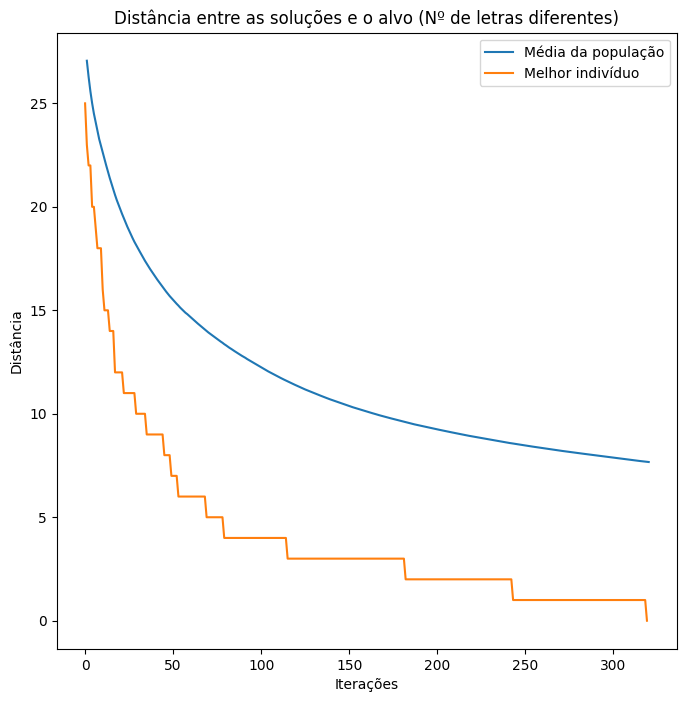

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Distância entre as soluções e o alvo (Nº de letras diferentes)')
plt.xlabel('Iterações')
plt.ylabel('Distância')
plt.plot(list(range(1,len(allpop_mean)+1)), allpop_mean,  label='Média da população')
plt.plot(allpop_bestvalue,  label='Melhor indivíduo')
plt.legend()
plt.show()

###Final considerations


To develop this exercise, some things were considered, such as:



* A range for mutation rate was defined between 0.05 and 0.2, whenever the mutation function was called, a random value between this range was generated.
* The metric to measure the distance was defined based on the number of different letters from the target, that is, the fewer letters the individual had, the better he was



With this, it was possible to notice the following behaviors:

- Higher crossover rates accelerate the convergence of the population to the solution.
- High mutation rate can cause loss of inherited characteristics (Lower rates are generally more efficient)

The code shows that higher crossover rates and lower mutation rates are more effective in finding the optimal solution in fewer generations. The most efficient algorithm is the one with crossover_rate = 1 and mutation_rate = 0.05.

Furthermore, it is notable how easy it is to arrive at the desired solution since there are metrics to evaluate more and less developed individuals and other factors such as mutations and crossing. When the simulation of trying to reach the target was carried out without considering these things, 10,000 generations of 100 individuals each were generated and none even approached the target, on the other hand, when selection factors (such as the survival function) and reproduction of the most adapted are added, converges very quickly to the exp result